In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
from PIL import Image

Fontconfig warning: ignoring UTF-8: not a valid region tag


TypeError: Invalid shape (10000,) for image data

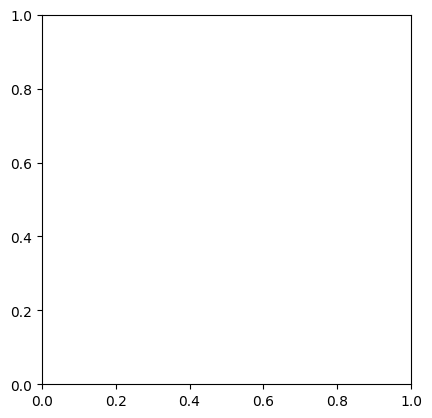

In [5]:
def load_images_from_folder():
    images = []
    for filename in os.listdir('Train1'):
        img = Image.open(os.path.join('Train1', filename)).convert('L') 
        img = img.resize((100, 100)) 
        if img is not None:
            images.append(np.asarray(img).flatten())
    return np.array(images)

data = load_images_from_folder()
print(data)

In [16]:
mean_image = np.mean(data, axis=0)
centered_data = data - mean_image

In [17]:
pca = PCA(n_components=50) 
transformed_data = pca.fit_transform(centered_data)

[0.14132514 0.12015377 0.05807944 0.04900581 0.03759132 0.03236193
 0.02742219 0.02581336 0.02260193 0.01942624 0.01680861 0.01371117
 0.01287981 0.01261933 0.01178917 0.01127303 0.01083469 0.00968499
 0.00941363 0.00874725 0.00813066 0.00795785 0.00767311 0.00654575
 0.00640934 0.00623706 0.00552719 0.00521545 0.00499319 0.00464871
 0.00426982 0.00420582 0.00408196 0.00385982 0.00376123 0.00359182
 0.00357672 0.00343305 0.00330189 0.00321027 0.00308504 0.00292165
 0.00284975 0.0027344  0.00271883 0.00255227 0.00252462 0.00246579
 0.00237411 0.00227753]


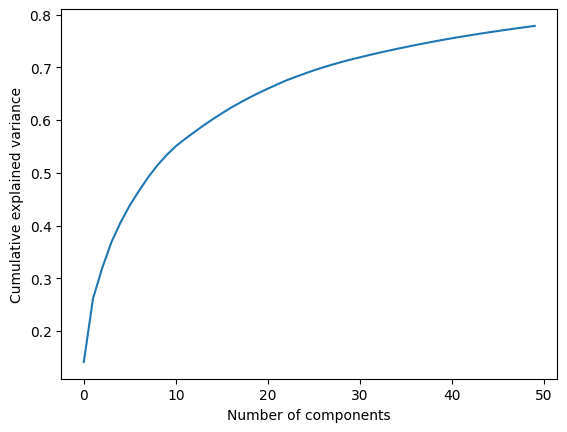

In [18]:
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

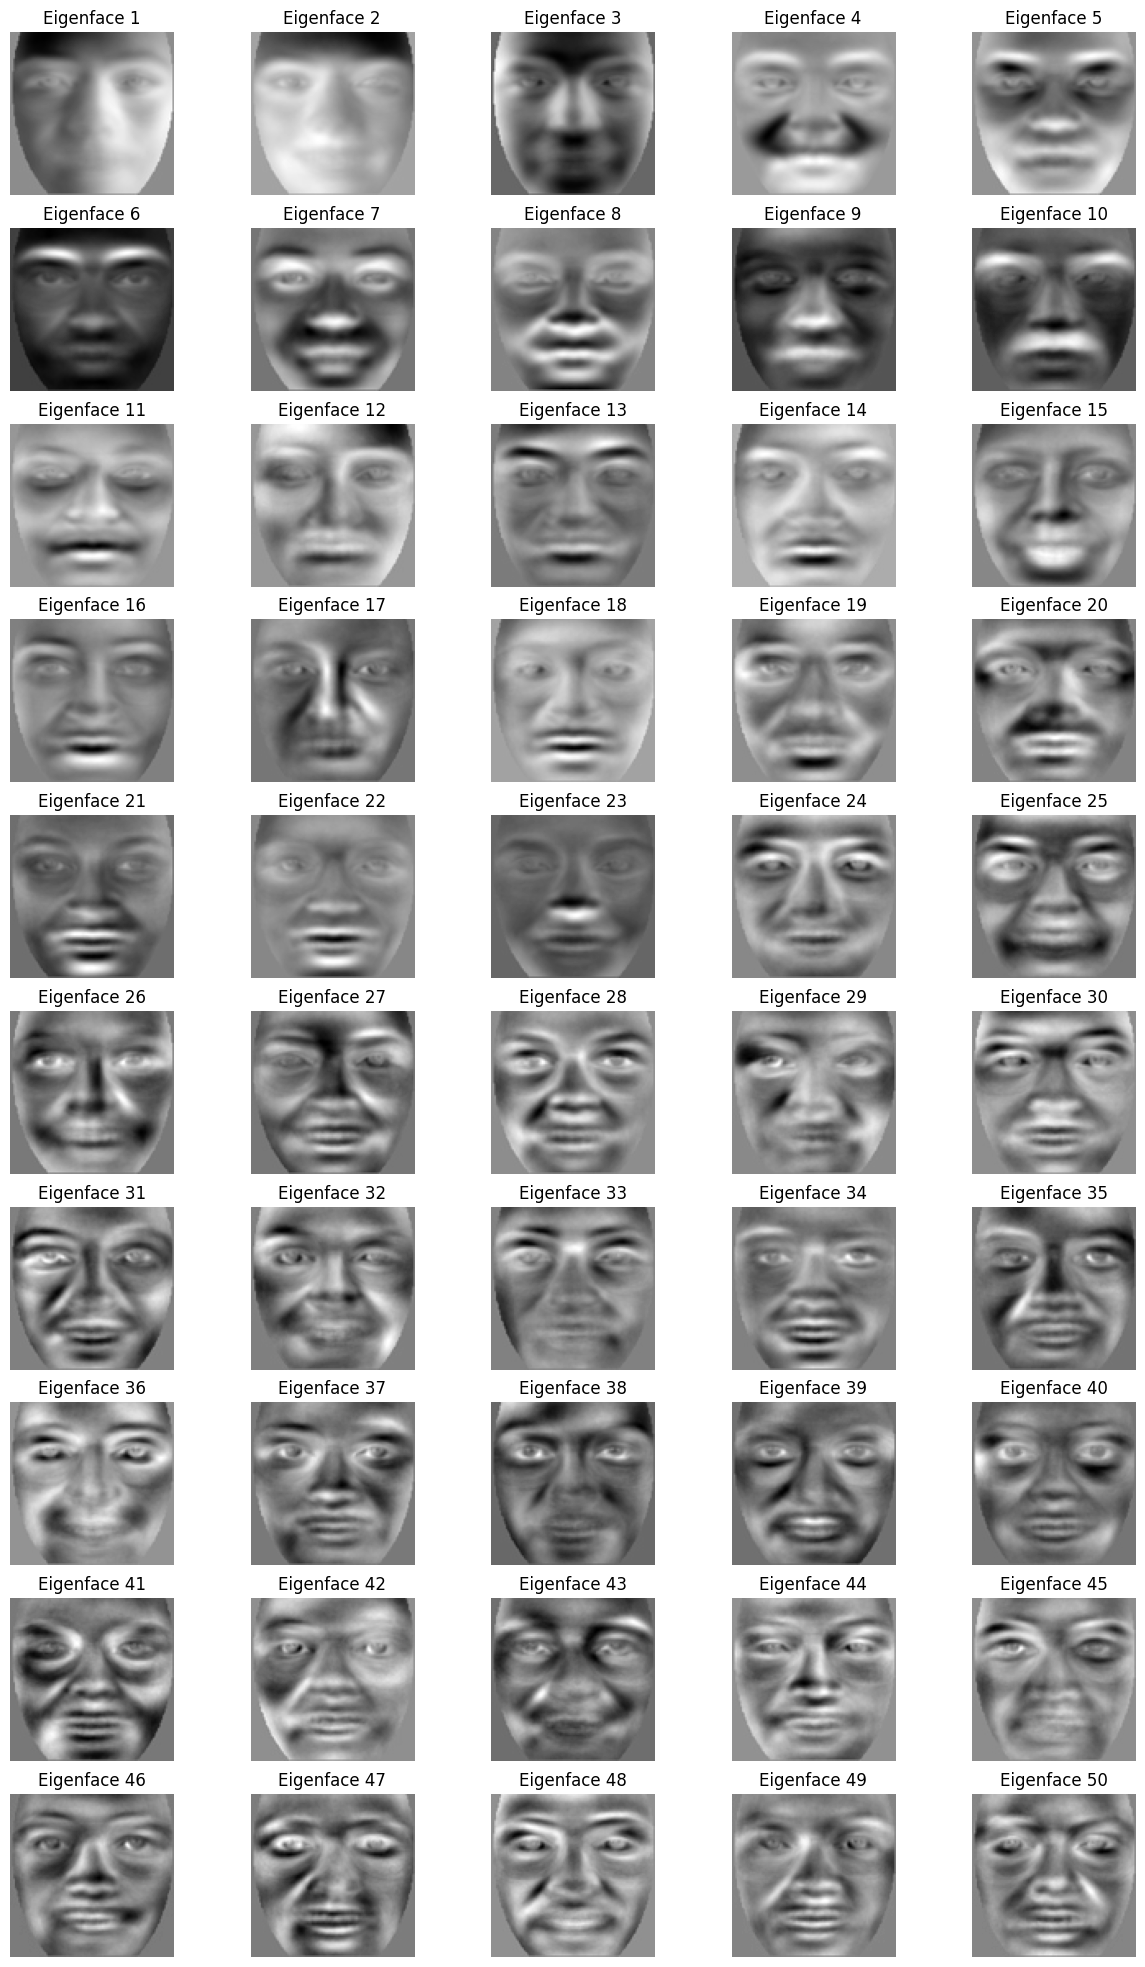

In [19]:
def plot_eigenfaces(pca, n_col=5, image_shape=(100, 100)):
    fig, axes = plt.subplots(nrows=int(np.ceil(pca.components_.shape[0] / n_col)), ncols=n_col, figsize=(15, (pca.components_.shape[0] / n_col) * 2.5))
    for i, ax in enumerate(axes.flat):
        if i < pca.components_.shape[0]:
            ax.imshow(pca.components_[i].reshape(image_shape), cmap='gray')
            ax.set_title(f"Eigenface {i+1}")
        ax.axis('off')
    plt.show()

plot_eigenfaces(pca, image_shape=(100, 100)) 

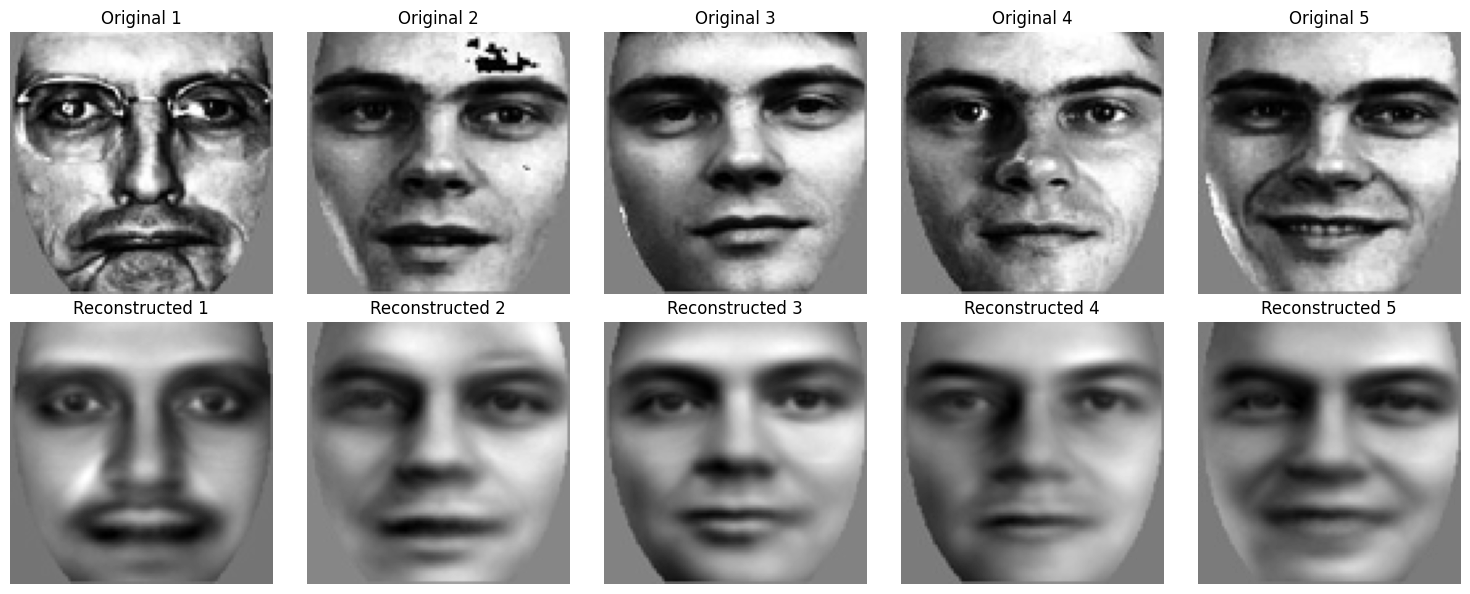

In [20]:
def reconstruct_faces(transformed_data, pca, mean_image, k, image_shape=(100, 100)):
    top_k_eigenfaces = pca.components_[:k]
    
    reconstructed_faces = np.dot(transformed_data[:,:k], top_k_eigenfaces) + mean_image
    
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
    for i in range(5):
        original_face = mean_image + centered_data[i]
        axes[0, i].imshow(original_face.reshape(image_shape), cmap='gray')
        axes[0, i].set_title(f"Original {i+1}")
        axes[0, i].axis('off')
        reconstructed_face = reconstructed_faces[i]
        axes[1, i].imshow(reconstructed_face.reshape(image_shape), cmap='gray')
        axes[1, i].set_title(f"Reconstructed {i+1}")
        axes[1, i].axis('off')
    plt.tight_layout()
    plt.show()

reconstruct_faces(transformed_data, pca, mean_image, k=50, image_shape=(100, 100))


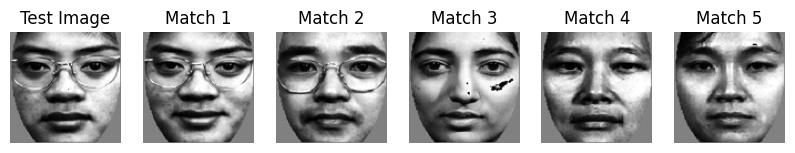

In [21]:
from scipy.spatial import distance

def find_closest_images(pca, mean_image, original_data, k, image_shape=(100, 100)):
    test_image = Image.open('/Users/hardi/OneDrive/Desktop/CMSC426/StarterFiles/Test1/00189fa010.940128.jpg').convert('L')
    test_image = test_image.resize(image_shape)
    test_image_vector = np.asarray(test_image).flatten()
    centered_test_image = test_image_vector - mean_image
    test_image_transformed = pca.transform(centered_test_image.reshape(1, -1))

    distances = distance.cdist(test_image_transformed, transformed_data[:,:k], 'euclidean')

    closest_indices = distances.argsort()[0][:5]

    plt.figure(figsize=(10, 2))
    plt.subplot(1, 6, 1)
    plt.imshow(test_image_vector.reshape(image_shape), cmap='gray')
    plt.title("Test Image")
    plt.axis('off')

    for i, idx in enumerate(closest_indices, start=1):
        plt.subplot(1, 6, i+1)
        plt.imshow(original_data[idx].reshape(image_shape), cmap='gray')
        plt.title(f"Match {i}")
        plt.axis('off')
        
    plt.show()

find_closest_images(pca, mean_image, data, k=50, image_shape=(100, 100))
